<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/first_test_neqsim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install py4j
!rm -rf testneqsim
!git clone https://github.com/EvenSol/NeqSim-Colab.git
!cd NeqSim-Colab
!pip install NeqSim-Colab/lib/neqsim-0.0.1-py3-none-any.whl

Cloning into 'NeqSim-Colab'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 115 (delta 37), reused 10 (delta 3), pack-reused 43
Receiving objects: 100% (115/115), 61.87 MiB | 10.31 MiB/s, done.
Resolving deltas: 100% (58/58), done.
Processing ./NeqSim-Colab/lib/neqsim-0.0.1-py3-none-any.whl


##Import NeqSim##

Start by importing the NeqSim libraries and packages used for plotting.

In [0]:
import neqsim
import time
time.sleep(3)
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Calculation of boiling point of pure components.
Calculate the boiling point temperature of pure methane, propane and n-heptane at 1 atm. 
Draw the boiling point temperatrure line of the pure components between 1 atm. and 10 bar.

methane buble point temperature  -161.14414719123826  at pressure  1.01325
methane entalpy of vaporization  (404.8255398402311, ' kJ/kg')


Text(0, 0.5, 'Pressure [bara]')

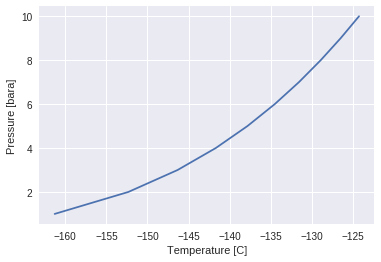

In [0]:
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 1.0) #adding 1 mole methane to the fluid
fluid1.setTemperature(111.0) # setting an initial temperature of -160 deg C
fluid1.setPressure(1.01325)#
bubt(fluid1)
print('methane buble point temperature ', fluid1.getTemperature('C'), " at pressure ", fluid1.getPressure('bara'))
print('methane entalpy of vaporization ', (fluid1.getPhase('gas').getEnthalpy('kJ/kg')-fluid1.getPhase('oil').getEnthalpy('kJ/kg'), ' kJ/kg'))

def bubleP(pressure):
    fluid1.setPressure(pressure)
    bubt(fluid1)
    return fluid1.getTemperature('C')

pressure = np.arange(1.0, 11.0, 1.0)
temperature = [bubleP(P) for P in pressure]

plt.plot(temperature, pressure)
plt.xlabel('Temperature [C]')
plt.ylabel('Pressure [bara]')

## Calculation of heat of vapourization of pure components.
Calculate the heat of vapourization at 1 atm for methane. Draw the heat of vapourization line  of methane between 1 atm. and 10 bar.

methane entalpy of vapourization  (524.1675011225673, ' kJ/kg')


Text(0, 0.5, 'Enthalpy of vaporization [kJ/kg]')

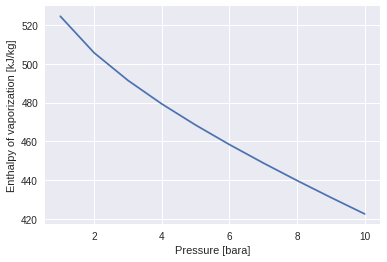

In [0]:
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 1.0) #adding 1 mole methane to the fluid
fluid1.setTemperature(111.0) # setting an initial temperature of -160 deg C
fluid1.setPressure(1.01325)#
bubt(fluid1)
fluid1.init(3) #initializes/calculates all thermodynamic properties of the fluid (including enthalpy)
print('methane entalpy of vapourization ', (fluid1.getPhase('gas').getEnthalpy('kJ/kg')-fluid1.getPhase('oil').getEnthalpy('kJ/kg'), ' kJ/kg'))

def enthalp(pressure):
    fluid1.setPressure(pressure)
    bubt(fluid1)
    fluid1.init(3) 
    return (fluid1.getPhase('gas').getEnthalpy('kJ/kg')-fluid1.getPhase('oil').getEnthalpy('kJ/kg'))

pressure = np.arange(1.0, 11.0, 1.0)
entha = [enthalp(P) for P in pressure]

plt.plot(pressure, entha)
plt.xlabel('Pressure [bara]')
plt.ylabel('Enthalpy of vaporization [kJ/kg]')

Text(0, 0.5, 'Pressure [bara]')

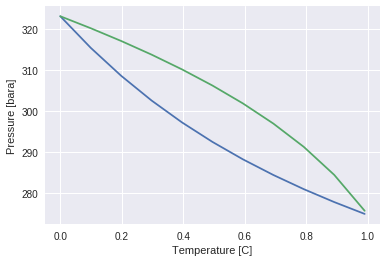

In [0]:
bubtemp = []
dewtemp = []
x = []
y = []
x2 = []
y2 = []
comp1 = 'propane'
comp2 = 'n-butane'

fluid1 = fluid('srk')
addComponent(fluid1, comp1,0.000001)
addComponent(fluid1, comp2,1.01)
fluid1.setMixingRule('classic')
fluid1.setTemperature(200.0)
fluid1.setPressure(5.0)
try:
    for temp in range(0,11):
        bubtemp.append(bubt(fluid1))
        dewtemp.append(dewt(fluid1))
        fluid1.init(0)
        x.append(fluid1.getPhase(0).getComponent(0).getz())
        fluid1.addComponent(comp2, -0.1)
        fluid1.addComponent(comp1, 0.1)
except:
        print('no dewt found')

plt.plot(x, bubtemp, label='bubT')
plt.plot(x, dewtemp, label="dewT")
plt.xlabel('Temperature [C]')
plt.ylabel('Pressure [bara]')

In [0]:
adibaticEfficiency = 0.9

fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 90.0) #adding 1 mole methane to the fluid
fluid1.addComponent('ethane', 10.0) #adding 1 mole methane to the fluid
fluid1.setTemperature(23.0, 'C') # setting an initial temperature of -160 deg C
fluid1.setPressure(25.0, 'bara')#
fluid1.setTotalFlowRate(1.0, 'MSm3/day')
TPflash(fluid1)
fluid1.init(3)# need to call init 3 the read entropy/enthalpy

inletEntropy = fluid1.getEntropy()
inletEnthalpy = fluid1.getEnthalpy('J')

fluid1.setPressure(50.0)
PSflash(fluid1, inletEntropy)

outAdiabaticEnthalpy = fluid1.getEnthalpy('J')
outRealEnthalpy = (outAdiabaticEnthalpy-inletEnthalpy)/adibaticEfficiency + inletEnthalpy
PHflash(fluid1, outRealEnthalpy)

print('1.')
print('Compressor power ', (outRealEnthalpy-inletEnthalpy)/1.0e3, 'kW')
print('Real outlet temperature ', fluid1.getTemperature('C'), ' C')

1.
Compressor power  954.4137091826815 kW
Real outlet temperature  78.73166520253483  C


#Calculation of phase envelope
Calculation of phase envelope....

In [0]:
thermoSystem = neqsim.thermo.system.SystemSrkEos(280.0,10.0)
thermoSystem.addComponent("nitrogen", 1.0)
thermoSystem.addComponent("methane", 10.0)
thermoSystem.addComponent("ethane", 4.0)
thermoSystem.addComponent("propane", 2.0)
thermoSystem.addComponent("i-butane", 1.0)
thermoSystem.addComponent("n-butane", 1.0)
thermoSystem.addComponent("nC10", 1.0)

thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(thermoSystem)
thermoOps.calcPTphaseEnvelope()

plt.plot(list(thermoOps.getOperation().get("dewT")),list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot(list(thermoOps.getOperation().get("bubT")),list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('PT envelope')
plt.xlabel('Temperature [\u00B0C]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()

#Hydrate calculations¶
##How to find hydrate temperature
Hydrate temperatures can be found ...

In [0]:
pressure = 150.0 #@param {type:"number"}
thermoSystem = neqsim.thermo.system.SystemSrkEos(280.0,pressure)
thermoSystem.addComponent("methane", 90.0)
thermoSystem.addComponent("ethane", 10.0)
thermoSystem.addComponent("propane", 1.0)
thermoSystem.addComponent("water", 4.0)
thermoSystem.setHydrateCheck(True);
thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(thermoSystem)
thermoOps.hydrateFormationTemperature()

print("Hydrate equilibrium temperature ", thermoSystem.getTemperature()-273.15, " C")